## Police Arrests
### This dataset contains data from individuals arrested by a police officer in Montgomery County, including whether the arrest location is within 500 feet of a school. Some of the questions we would like to answer from this dataset include what the demographics of arrests in montgomery county look like including race and gender as well as the districts and times arrests occur.
### Update Frequency: Daily

### Source:https://data.montgomerycountymd.gov/Public-Safety/Police-Arrests/bep7-ghja/about_data

#### Authors:
* Arega, Beza
* George, Andrew
* Kuendzong, Merveille Lore
* Wujira, Tigist
* Nataliia Padilla



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
data_1 = pd.read_csv('/content/Police_Arrests_20241025.csv')
data_1.head()


,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,258,Asian,Female,20,NON-HISPANIC,1.0,0,1D,PSB,01/17/2021 09:55:56 PM
1,191,White,Male,43,HISPANIC,6.0,0,TOD,FSB,01/01/2021 04:12:36 AM
2,237,White,Male,26,HISPANIC,5.0,0,5D,PSB,01/16/2021 08:51:32 PM
3,17,Black/African American,Male,25,NON-HISPANIC,6.0,0,6D,PSB,01/02/2021 06:08:13 AM
4,108,Black/African American,Male,36,NON-HISPANIC,4.0,0,IMTD,MSB,01/03/2021 10:25:00 AM


In [ ]:
#create columns for date, time and year
data_1['Date'] = pd.to_datetime(data_1['Event Date/Time']).dt.date
data_1['Time'] = pd.to_datetime(data_1['Event Date/Time']).dt.hour #saving only the hour value
data_1['Year'] = pd.to_datetime(data_1['Date']).dt.year
data_1.head()

<ipython-input-6-a4b8d7d8c6be>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1['Date'] = pd.to_datetime(data_1['Event Date/Time']).dt.date
<ipython-input-6-a4b8d7d8c6be>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1['Time'] = pd.to_datetime(data_1['Event Date/Time']).dt.hour #saving only the hour value


,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Date,Time,Year
0,258,Asian,Female,20,NON-HISPANIC,1.0,0,1D,PSB,01/17/2021 09:55:56 PM,2021-01-17,21,2021
1,191,White,Male,43,HISPANIC,6.0,0,TOD,FSB,01/01/2021 04:12:36 AM,2021-01-01,4,2021
2,237,White,Male,26,HISPANIC,5.0,0,5D,PSB,01/16/2021 08:51:32 PM,2021-01-16,20,2021
3,17,Black/African American,Male,25,NON-HISPANIC,6.0,0,6D,PSB,01/02/2021 06:08:13 AM,2021-01-02,6,2021
4,108,Black/African American,Male,36,NON-HISPANIC,4.0,0,IMTD,MSB,01/03/2021 10:25:00 AM,2021-01-03,10,2021


In [ ]:
#determine day fo the week based on the Date
data_1['Day of the Week'] = pd.to_datetime(data_1['Date']).dt.day_name()
data_1.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,Date,Time,Year,Day of the Week
0,258,Asian,Female,20,NON-HISPANIC,1.0,0,1D,PSB,01/17/2021 09:55:56 PM,2021-01-17,21,2021,Sunday
1,191,White,Male,43,HISPANIC,6.0,0,TOD,FSB,01/01/2021 04:12:36 AM,2021-01-01,4,2021,Friday
2,237,White,Male,26,HISPANIC,5.0,0,5D,PSB,01/16/2021 08:51:32 PM,2021-01-16,20,2021,Saturday
3,17,Black/African American,Male,25,NON-HISPANIC,6.0,0,6D,PSB,01/02/2021 06:08:13 AM,2021-01-02,6,2021,Saturday
4,108,Black/African American,Male,36,NON-HISPANIC,4.0,0,IMTD,MSB,01/03/2021 10:25:00 AM,2021-01-03,10,2021,Sunday


In [ ]:
#remove the Event Date/Time column
data = data_1.drop(columns=['Event Date/Time'])
data.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Date,Time,Year,Day of the Week
0,258,Asian,Female,20,NON-HISPANIC,1.0,0,1D,PSB,2021-01-17,21,2021,Sunday
1,191,White,Male,43,HISPANIC,6.0,0,TOD,FSB,2021-01-01,4,2021,Friday
2,237,White,Male,26,HISPANIC,5.0,0,5D,PSB,2021-01-16,20,2021,Saturday
3,17,Black/African American,Male,25,NON-HISPANIC,6.0,0,6D,PSB,2021-01-02,6,2021,Saturday
4,108,Black/African American,Male,36,NON-HISPANIC,4.0,0,IMTD,MSB,2021-01-03,10,2021,Sunday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     25951 non-null  int64  
 1   Subject's race          25951 non-null  object 
 2   Subject's gender        25951 non-null  object 
 3   Subject's age           25951 non-null  int64  
 4   Ethnicity               25951 non-null  object 
 5   District of occurrence  25834 non-null  float64
 6   Adjacent to School      25951 non-null  int64  
 7   Assigned Division       25798 non-null  object 
 8   Assigned Bureau         20770 non-null  object 
 9   Date                    25951 non-null  object 
 10  Time                    25951 non-null  int32  
 11  Year                    25951 non-null  int32  
 12  Day of the Week         25951 non-null  object 
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 2.4+ MB


In [ ]:
data.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School,Time,Year
count,25951.000000,25951.000000,25834.000000,25951.000000,25951.000000,25951.000000
mean,12976.000000,31.849678,3.974143,0.084236,12.975300,2022.512543
std,7491.552754,13.002639,1.749084,0.277746,7.188916,1.075631
min,1.000000,0.000000,1.000000,0.000000,0.000000,2021.000000
25%,6488.500000,22.000000,3.000000,0.000000,8.000000,2022.000000
50%,12976.000000,30.000000,4.000000,0.000000,15.000000,2023.000000
75%,19463.500000,40.000000,5.000000,0.000000,19.000000,2023.000000
max,25951.000000,99.000000,8.000000,1.000000,23.000000,2024.000000


In [ ]:
#checking the youngest person
data[data["Subject's age"]<10]


,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Date,Time,Year,Day of the Week
5338,5502,Black/African American,Male,1,NON-HISPANIC,3.0,0,TOD,FSB,2021-12-17,1,2021,Friday
25293,25055,Unknown,Male,0,HISPANIC,1.0,0,RCPD,NaN,2024-09-03,7,2024,Tuesday


*** The minimum age in this dataset is 1 year old. We have one record with one year old. we can assume that person of 1 year old is just a missing information.

In [ ]:
#checking old folks
data[data["Subject's age"]==99]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Date,Time,Year,Day of the Week
1576,2968,White,Female,99,NON-HISPANIC,6.0,0,6D,PSB,2021-07-26,15,2021,Monday
3129,2025,White,Female,99,NON-HISPANIC,1.0,0,RCPD,NaN,2021-05-21,21,2021,Friday
5331,6585,White,Male,99,HISPANIC,6.0,0,GPD,NaN,2022-02-17,0,2022,Thursday
9598,13037,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2023-01-26,16,2023,Thursday
16553,15931,White,Male,99,NON-HISPANIC,1.0,0,RCPD,NaN,2023-06-17,12,2023,Saturday
16567,20351,White,Female,99,HISPANIC,3.0,0,3D,PSB,2024-01-22,19,2024,Monday
22791,21454,Asian,Female,99,NON-HISPANIC,4.0,1,CED,FSB,2024-03-11,10,2024,Monday
25447,23645,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2024-02-24,0,2024,Saturday


In [ ]:
data[data["Subject's age"] == 99].shape[0]

8

*** I am curious about these 99 olds. I am just thinking may be these entries are just a default entries.

In [ ]:
data = data[(data["Subject's age"] != 1) & (data["Subject's age"] != 99)]

In [ ]:
#median vs average age of people arested
print(data["Subject's age"].median())
print(data["Subject's age"].mean())

30.0
31.83015958677049


# New Section

In [ ]:
data.isnull().sum()

,0
ID Reference Number,0
Subject's race,0
Subject's gender,0
Subject's age,0
Ethnicity,0
District of occurrence,117
Adjacent to School,0
Assigned Division,153
Assigned Bureau,5178
Date,0


In [ ]:
#We have 117 NaN records in column "District of occurrence". Here is what these records look like
data[data['District of occurrence'].isnull()].head(7)
#since all the other columns look legit we can leave it as it is and remove NaNs when needed

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Date,Time,Year,Day of the Week
160,146,White,Male,24,HISPANIC,NaN,0,TPPD,NaN,2021-01-09,23,2021,Saturday
632,1006,Black/African American,Male,56,NON-HISPANIC,NaN,0,2D,PSB,2021-03-11,13,2021,Thursday
1103,679,Black/African American,Male,37,NON-HISPANIC,NaN,0,3D,PSB,2021-02-16,0,2021,Tuesday
1489,4164,White,Male,25,HISPANIC,NaN,0,3D,PSB,2021-09-24,1,2021,Friday
1587,3845,White,Male,35,HISPANIC,NaN,0,6D,PSB,2021-09-18,16,2021,Saturday
3375,2995,White,Male,39,NON-HISPANIC,NaN,0,3D,PSB,2021-06-03,11,2021,Thursday
3503,2994,White,Male,50,NON-HISPANIC,NaN,0,3D,PSB,2021-06-03,11,2021,Thursday


In [ ]:
data.nunique()

,0
ID Reference Number,25942
Subject's race,6
Subject's gender,2
Subject's age,77
Ethnicity,2
District of occurrence,7
Adjacent to School,2
Assigned Division,24
Assigned Bureau,4
Date,1393


In [ ]:
data['Ethnicity'].unique()

array(['NON-HISPANIC', 'HISPANIC'], dtype=object)

In [ ]:
data["Subject's race"].unique()

array(['Asian', 'White', 'Black/African American', 'Unknown',
       'American Indian/ALSK Natv', 'Hawaiian/Pacific Islander'],
      dtype=object)

In [ ]:
data["Subject's age"].unique()

array([20, 43, 26, 25, 36, 32, 31, 52, 23, 51, 48, 41, 19, 56, 46, 18, 21,
       35, 38, 16, 49, 55, 30, 40, 29, 53, 37, 60, 17, 33, 57, 34, 27, 13,
       24, 28, 15, 39, 42, 22, 45, 47, 58, 62, 64, 50, 44, 54, 14, 59, 63,
       61, 12, 67, 65, 72, 10, 69, 71, 66, 80, 79, 11, 76, 73, 75, 68, 83,
       70, 78, 77, 74, 84, 85, 82, 86,  0])

In [ ]:
data['Assigned Bureau'].unique()

array(['PSB', 'FSB', 'MSB', nan, 'ISB'], dtype=object)

#### Four major bureaus:
* Field Services Bureau
   * The Field Services Bureau (FSB) provides specialized services in several essential service delivery functions for safely and effectively executing routine and complex field operations.
* Investigative Services Bureau.
    * The Investigative Services Bureau is the primary investigative branch for serious and violent crime in Montgomery County. Detectives are assigned to one of the four divisions in this Bureau. They are responsible for investigations leading to the detection, identification, apprehension, and prosecution of persons responsible for committing serious crimes in the County. The Bureau is comprised of five major divisions.
* Management Services Bureau
    * The Management Services Bureau provides essential administrative and management support services to the department and technical support to police operations through various types of technology, analysis, education, training, and maintenance of active and historical records and warrants. The Bureau is comprised of seven divisions.
* Patrol Services Bureau.
    * The Patrol Services Bureau (PSB) provides direct police patrol services to the public through the six District Stations.

In [ ]:
data['Assigned Division'].unique()

array(['1D', 'TOD', '5D', '6D', 'IMTD', 'TPPD', 'RCPD', '4D', '2D', '3D',
       'SVID', 'GPD', 'CID', 'MCFM', 'SID', nan, 'MCD', 'PSTA', 'MCSO',
       'CED', 'SOD', 'FSB', 'PSCC', 'PERS', 'ISB'], dtype=object)

#### DISTRICTS
* 1D Rockville
* 2D Bethesda
* 3D Silver Spring
* 4D Wheaton
* 5D Germantown
* 6D Montgomery Village

In [ ]:
#create a subset of the data frame with only 6 of the Assigned Divisions
loc_df = data[data['Assigned Division'].isin(['1D','2D','3D','4D','5D','6D'])]
loc_df.head()


,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Date,Time,Year,Day of the Week
0,258,Asian,Female,20,NON-HISPANIC,1.0,No,1D,PSB,2021-01-17,21,2021,Sunday
2,237,White,Male,26,HISPANIC,5.0,No,5D,PSB,2021-01-16,20,2021,Saturday
3,17,Black/African American,Male,25,NON-HISPANIC,6.0,No,6D,PSB,2021-01-02,6,2021,Saturday
5,164,Black/African American,Male,32,NON-HISPANIC,6.0,No,6D,PSB,2021-01-10,21,2021,Sunday
7,118,Black/African American,Male,52,NON-HISPANIC,5.0,No,5D,PSB,2021-01-08,15,2021,Friday


## Preliminary results:
  1. Subject's age: min age is 1 and max age is 99. Total of rows with values == 0 or 99 is 9 => median will give better 'average' age.
  Median age of people arrested is 30 years old.
  25th percentile is 22 years old, 75th percentile is 40 y.o.
  2. Null values are detected only in District of occurentce, Assigned Division and Assigned Bureau column. This can be explained by the specifics of the dataset ( subjects moving form distric to distric, several bureaus assigned, etc.) => Null values will not be removed form the dataset


#Age Distribution by Race and Gender

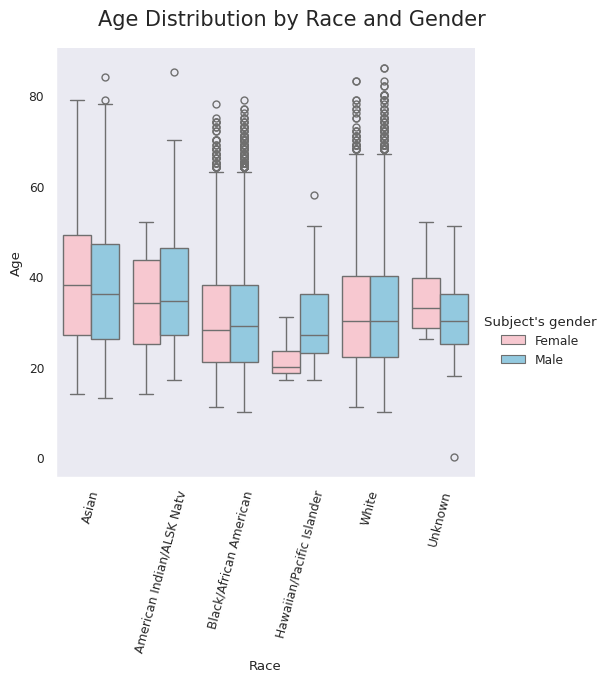

In [ ]:
# Define palette and order
palette_colors = {'Female': "pink", 'Male': "skyblue"}
race_order = ['Asian', 'American Indian/ALSK Natv', 'Black/African American', 'Hawaiian/Pacific Islander', 'White', 'Unknown']

# Set  styles
sns.set_style('dark')
sns.set_context('paper')


# Create a box plot and set the order of the categories
plot1 = sns.catplot(y="Subject's age", x="Subject's race", data=data,
            kind="box", hue = "Subject's gender", order = race_order, palette = palette_colors)

# Add title and labels
plot1.fig.suptitle("Age Distribution by Race and Gender", y = 1.05, fontsize = 15)
plot1.set(xlabel="Race",
         ylabel="Age")

# Rotate x-tick labels
plt.xticks(rotation =75)

# Show plot
plt.show()

The plot shows that median age in arrests is near 30 for most racial groups.Among racial groups, Asians have the highest median age for arrests, whereas Hawaiian/Pacific Islander and Black/African American have the lowest median age for arrests. However, considering that the range of Hawaiin/Pacific Islander is relatively small compared to other race groups this likely indicates that there are not a signficant number of Hawaiian/Pacific Islander arrests in Montgomery County. Regarding gender, the plot shows that median arrest ages among gender groups within the same race do not differ significantly, except for Hawaiian/Pacific Islander and Unknown races.

We also observe a large number of outliers for the White and Black/African American racial groups, indicating that while most arrests involve individuals around the median age, there are several arrests of people at significantly older ages within these groups.

#Yearly Counts of Cases by Assigned Bureau

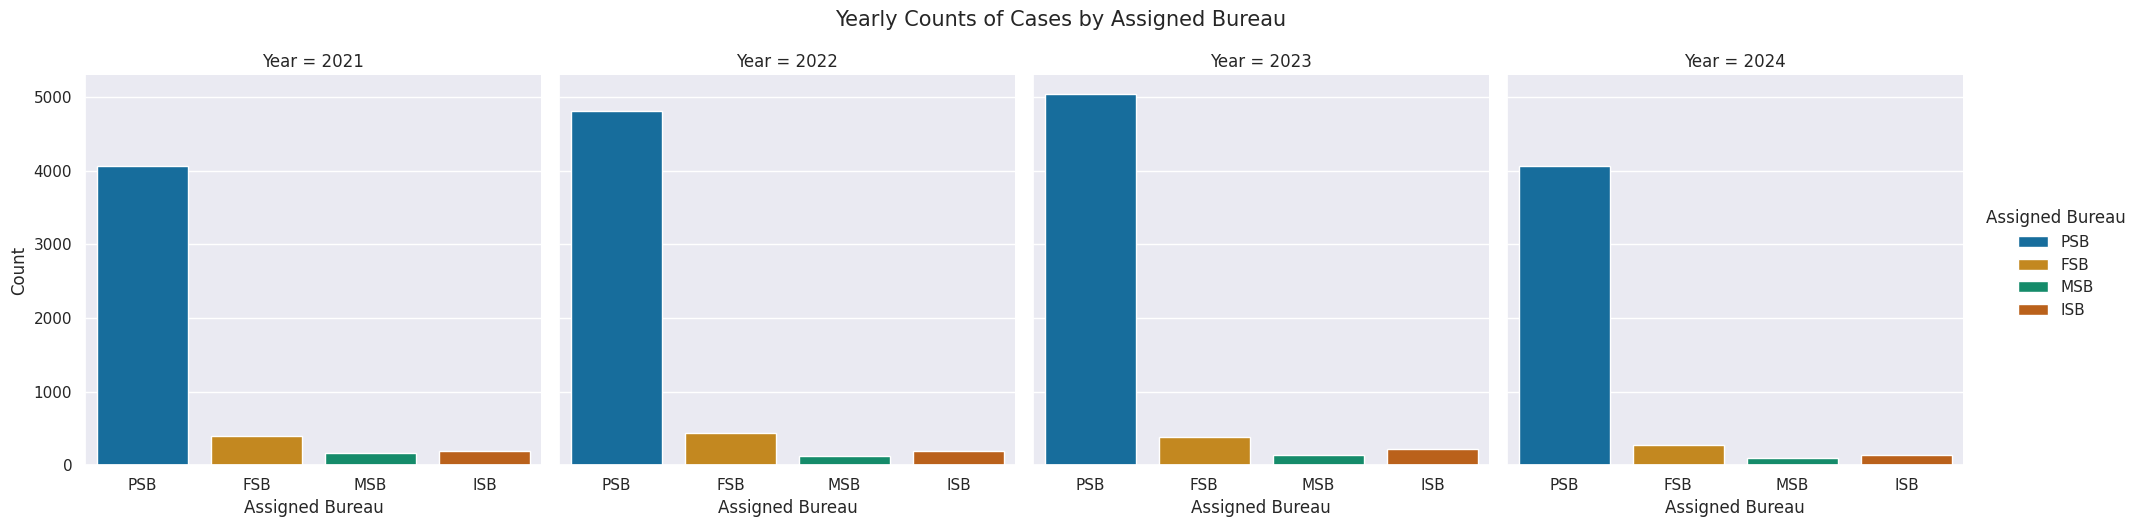

In [ ]:
# Set theme for the plot
sns.set_theme(style="darkgrid", context="notebook", palette="colorblind")

# Create the plot
plot2 = sns.catplot(x="Assigned Bureau",
                data=data, kind="count",
                col="Year", hue="Assigned Bureau")

# Add title and axis labels
plot2.fig.suptitle("Yearly Counts of Cases by Assigned Bureau", y = 1.05, fontsize = 15)
plot2.set(xlabel="Assigned Bureau",
       ylabel="Count")
# Show plot
plt.show()

This plot shows the yearly counts of cases assigned by bureau from 2021 to 2024. Looking at the plot we can tell that The PSB (Patrol Services) shows an increasing trend in the number of cases from 2021-2023.The FSB (Field Services) also shows a slight increase in cases over the years. Although the rise from 2021-2023 is more moderate in FSB compared to PSB. The MSB (Management Services) has a steady decrease and increase in cases, it’s similar to FSB, but with slightly lower numbers. There is decrease in 2022, an increase in 2023. The ISB (Investigative services) has the same growth/decline rate as FSB in cases throughout the years. With an increase in cases from 2021-2023. The plot visualizes that MSB has the lowest number of cases among the four bureaus throughout the years and PSB has the highest number of cases.



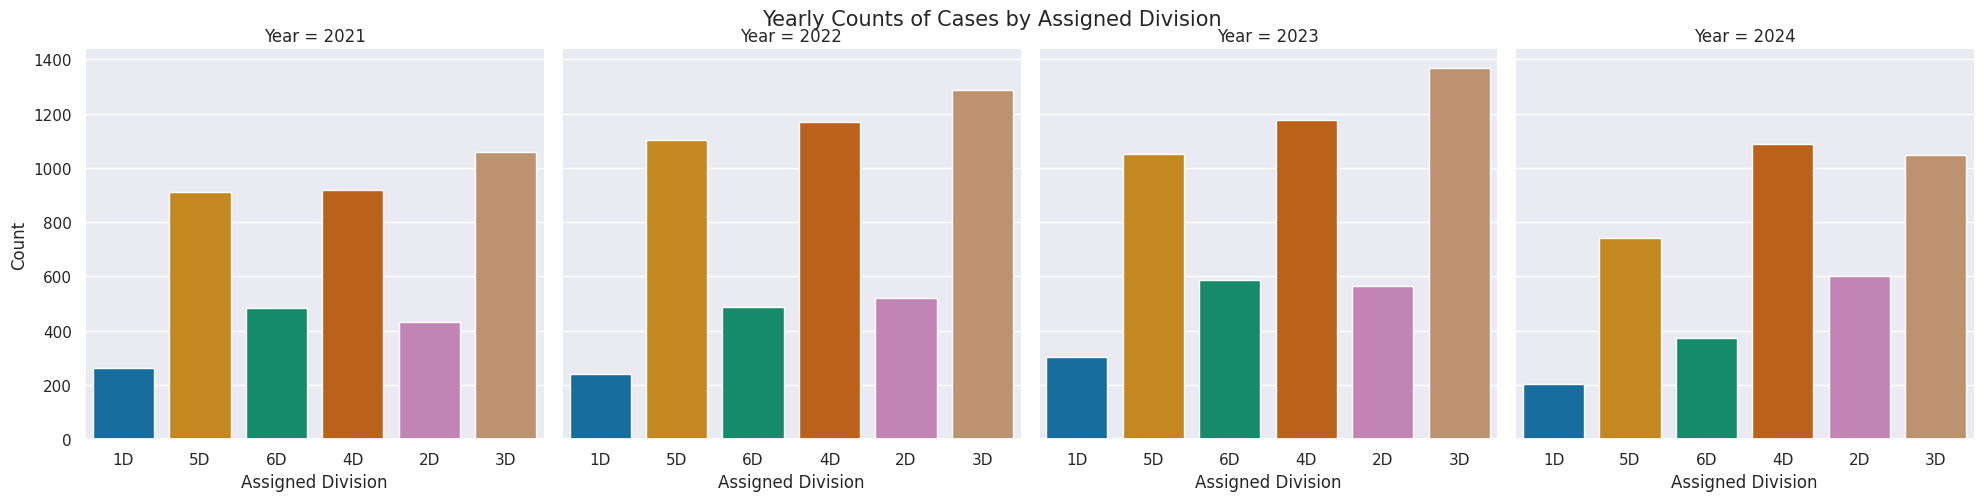

In [ ]:
# Set theme for the plot
sns.set_theme(style="darkgrid", context="notebook", palette="colorblind")

# Create the plot
plot2 = sns.catplot(x="Assigned Division",
                data=loc_df, kind="count",
                col="Year", hue="Assigned Division")

# Add title and axis labels
plot2.fig.suptitle("Yearly Counts of Cases by Assigned Division", y = 1, fontsize = 15)
plot2.set(xlabel="Assigned Division",
       ylabel="Count")
# Show plot
plt.show()

#### DISTRICTS
* 1D Rockville
* 2D Bethesda
* 3D Silver Spring
* 4D Wheaton
* 5D Germantown
* 6D Montgomery Village

We can see that Rockville has the lowest number of arrests, while Germantown, Wheaton and Silver Spring tend to have highest rates and growing rates.
However, general trend is increasing number of arrests throughout the county in 2021 -2023 (2024 is not complete yet, so numbers are not as relevant).

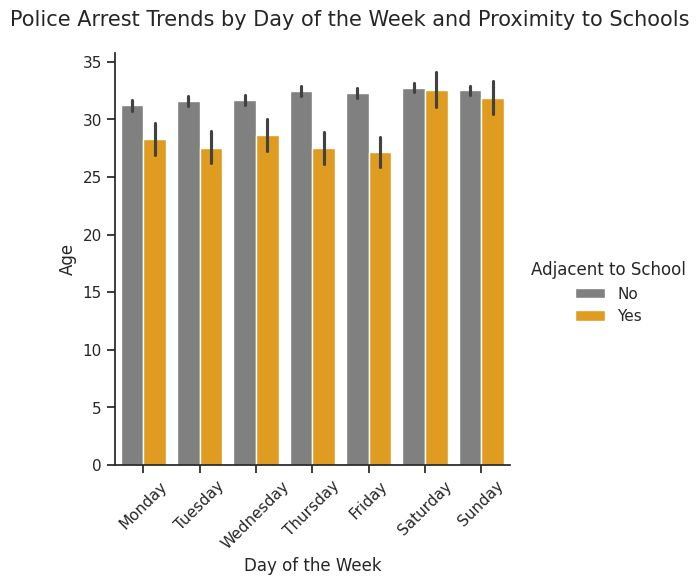

In [ ]:
# Replace values in the 'Adjacent to School' column
data['Adjacent to School'] = data['Adjacent to School'].replace({0: 'No', 1: 'Yes'})

# Set style
sns.set_style("ticks")

# Create a custom color palette and order days
palette = {'Yes': 'orange', 'No': 'grey'}
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create the bar plot of police arrests, separated by proximity to school
plot3 = sns.catplot(y="Subject's age", x="Day of the Week",
            data=data, hue="Adjacent to School", kind="bar",
            palette=palette, order = order)

# Add title and axis labels
plot3.fig.suptitle("Police Arrest Trends by Day of the Week and Proximity to Schools", fontsize=15, y =1.05)
plot3.set(xlabel="Day of the Week",
          ylabel="Age")

# Rotate x-tick labels
plt.xticks(rotation=45)

# Show plot
plt.show()

The average age of people arrested is generally consistent across all days of the week, between approximately 28 and 33. For arrests that occur adjacent to schools, the average age of those arrested is slightly lower on most days compared to arrests away from schools which suggests that younger people are being arrested near schools. However, on the weekends, the age difference between arrests near and away from school becomes minimal. The error bars are relatively narrow which shows low variability in the ages of those arrested across the week and near and far from schools.


#Distribution of age across the dataset

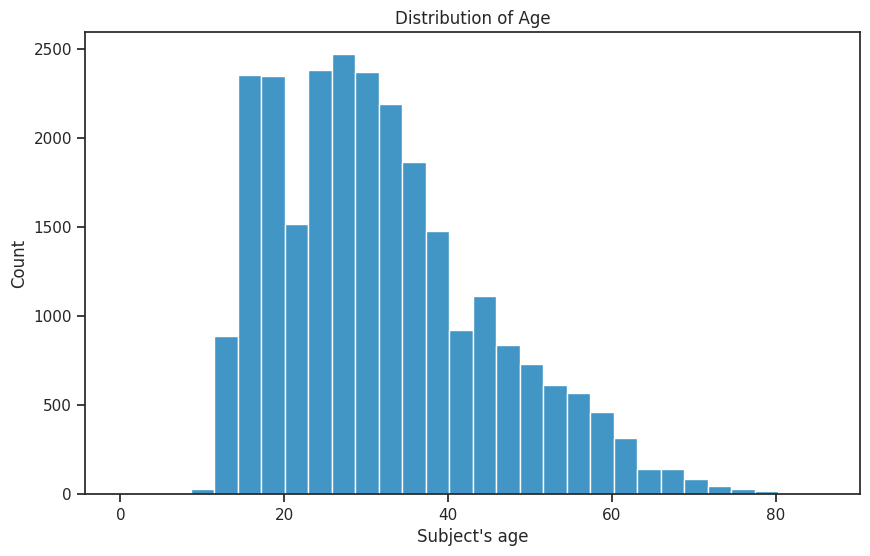

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data[("Subject's age")], bins=30)
plt.title('Distribution of Age')
plt.show()

The histogram shows that the distribution of ages is skewed to the right with the majority of the arrests approximately between the ages of 17 and 40. The plot also shows that people in their mid-twenties were the age groups with the most arrests.

#Distribution of time (hours)

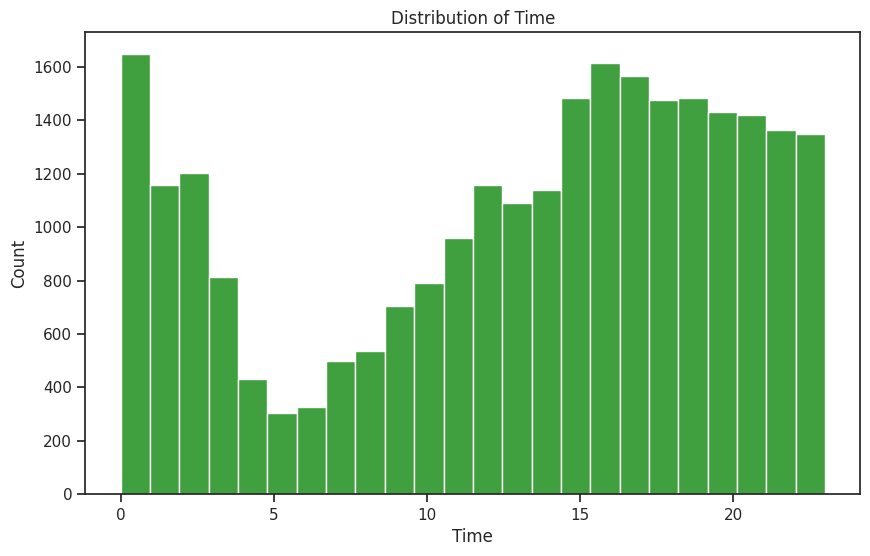

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data[("Time")], bins=24, color = 'green')
plt.title('Distribution of Time')
plt.show()

We can see that the lowest number of arrests happen between 4 and 6 am. At the same time peak of arrests happen at midnight and around 4 pm.


#Simulation of a nonparametric inference of the Median for the variable Subject's age

In [ ]:
print(data.shape) # our dataset has almost 26.000 observations

(25942, 13)


In [ ]:
np.random.seed(20)
nb_boot = 10000
boot_medians = []
sample_size = 2600  # about 10% of the data
for i in range(nb_boot):
  sample = np.random.choice(data["Subject's age"], size=sample_size, replace=True)
  boot_medians.append(np.median(sample))
lower_ci = np.percentile(boot_medians, 2.5)
upper_ci = np.percentile(boot_medians, 97.5)
median_estimate = np.median(boot_medians)

print("Bootstrap Median Estimate:", median_estimate)
print("95% Confidence Interval for the Median: [{:.2f}, {:.2f}]".format(lower_ci, upper_ci))

Bootstrap Median Estimate: 30.0
95% Confidence Interval for the Median: [29.00, 30.00]


Sample Representativeness: The sample accurately reflects the population’s central characteristics, indicating that the sampling process was effective in capturing the population’s distribution around the median.

The above code performs bootstrap sampling to estimate the median age from a sample and calculate a 95% confidence interval (CI) for that median.  
1.	The seed (np.random.seed(20): ensures that the random sampling is reproducible, meaning the results will be the same each time the code runs.
2.	Defining Parameters (nb_boot = 10000, sample_size = 2600):
nb_boot = 10000: The code will create 10,000 bootstrap samples. Higher numbers of samples generally lead to more stable estimates but require more computation.
sample_size = 2600: Each bootstrap sample will include 2600 randomly selected ages (10% of the data), drawn with replacement.
3.	Bootstrap Sampling (for i in range(nb_boot):):
•	For each of the 10,000 iterations:
o	A random sample of 2,600 ages is drawn from the data["Subject's age"] column, with replacement (allowing repeated values).
o	The median of each bootstrap sample is calculated using np.median(sample) and added to the list boot_medians.
•	After the loop, boot_medians will contain 10,000 median values, each calculated from a different random sample.
4.	Confidence Interval Calculation (lower_ci, upper_ci):
np.percentile(boot_medians, 2.5) calculates the 2.5th percentile of the 10,000 medians, and np.percentile(boot_medians, 97.5) calculates the 97.5th percentile. This gives the 95% confidence interval for the median.
This interval indicates that 95% of the bootstrap medians fall within this range, suggesting the range where the true median of the population is likely to lie.
5.	Calculating the Median Estimate (median_estimate):
np.median(boot_medians) calculates the central estimate for the median, based on the 10,000 bootstrap samples.
6.	 Output: The code then prints the estimated median and the 95% confidence interval, showing a plausible range for the median arrest age in the population.


In conclusion, this code uses bootstrapping to provide a robust median estimate for "Subject's age" and a 95% confidence interval, helping quantify uncertainty around the sample’s median. The narrowness of the confidence interval and alignment with the hypothetical population median can support conclusions about the sample’s representativeness concerning the population median.


### Summary:

Analyzing the data, we have identified patterns in arrests, such as the average age of people arrested, bureaus with the highest arrest rate, arrests that occur adjacent to school, and the peak time for arrests. We analyzed the demographic groups by focusing on age, gender, and race. The average age arrested in Montgomery county is 30 years olds. The box plot identifies the age distribution within the different races and gender which also shows that median arrest ages among gender groups within the same race are around the age 30. The bar graph visualized the yearly counts of cases assigned by the bureau from 2021-2024 to compare the rate of arrests throughout the years. The highest arrest among the four bureaus consistently throughout the years was PSB. The arrests that occur adjacent to the school are illustrated by the histogram, there is a correlation between younger age groups getting arrested near the schools. With further analysis, the peak time for arrest is midnight and around 4 pm. Based on the dataset, Rockville tend to have the lowest crime rates, while Wheaton, Germantown and Silver Spring the highest. The overal trend for arrests is growing. Using these different visualizations, we were able to analyze the data and have an understanding of the different patterns and relations of the dataset.